HIMAM BASHIRAN (2311110055)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
df_iris = pd.read_csv("Iris.csv")
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Preprocessing

1. Lakukan preprocessing untuk data Iris.csv. Perhatikan tipe data non numerik. Lakukan transformasi yang perlu pada tipe data non numerik.

In [3]:
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [4]:
df_iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Encoding untuk Variabel Species

In [5]:
encoding_species = {
    'setosa' : 0, 
    'versicolor' : 1, 
    'virginica' : 2}
df_iris['species'] = df_iris['species'].map(encoding_species)

In [6]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
# Cek tipe data setelah encoding
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

In [8]:
df_iris.duplicated().sum()

1

In [9]:
df_iris[df_iris.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,2


In [10]:
df_iris.drop_duplicates(inplace=True)

In [11]:
df_iris.duplicated().sum()

0

2. Bangun model regresi dengan regresi linear multivariable

## Data Splitting

In [12]:
# Menetapkan Variabel Fitur & Target
X_iris = df_iris.drop('petal_width', axis=1)
y_iris = df_iris["petal_width"]

In [13]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

In [14]:
print(X_iris.shape)
print(y_iris.shape)

(149, 4)
(149,)


## Regresi Linear Multivariabel

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X_train_iris, y_train_iris)

LinearRegression()

In [17]:
c = lr.intercept_
c

-0.27260705184421963

In [18]:
m = lr.coef_
m

array([-0.13658959,  0.20505653,  0.34937245,  0.32312688])

In [19]:
y_pred_train_iris = lr.predict(X_train_iris)
y_pred_train_iris

array([0.1866568 , 0.3751397 , 1.3082836 , 0.32795104, 0.23676384,
       2.25659357, 1.40470337, 0.25888362, 0.27176994, 0.38191753,
       2.07878239, 1.50035051, 1.41309533, 0.24371382, 0.27257701,
       1.08409082, 2.03011733, 2.16231584, 1.3014369 , 1.99749798,
       1.35449304, 2.12734416, 1.47296373, 0.23760533, 1.84865327,
       1.24437988, 0.20344072, 0.21632705, 0.47380851, 1.00048851,
       2.23686055, 0.43276278, 0.21861051, 0.30140576, 0.99213098,
       0.25203692, 1.30663504, 1.84626651, 0.24438317, 1.33398739,
       1.98155555, 0.32650907, 0.91467159, 1.77263586, 1.07959645,
       1.50028165, 1.75209578, 1.1683969 , 0.3834628 , 2.11059467,
       2.05669704, 0.21025298, 0.11987284, 1.11902806, 1.49740141,
       0.21783788, 1.85458961, 0.26569588, 0.32113878, 1.5778099 ,
       1.30062984, 1.56643441, 1.86909006, 2.0300829 , 1.2094082 ,
       0.21018412, 0.139537  , 2.26572374, 1.77793729, 0.25881476,
       0.23760533, 0.19575253, 1.41457174, 2.06824839, 0.28539

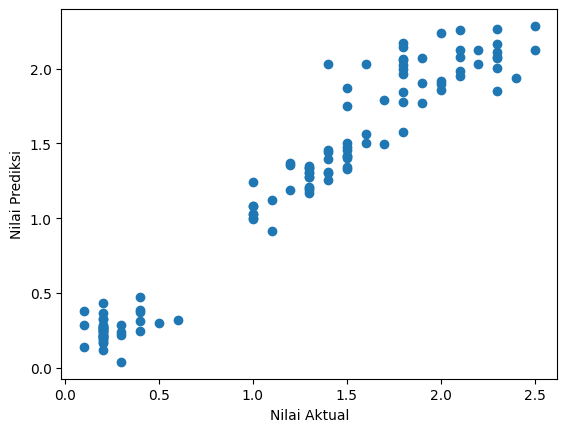

In [20]:
plt.scatter(y_train_iris, y_pred_train_iris)
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.show()

In [21]:
print(f"RMSE train multivariate linear regression: {round(np.sqrt(mean_squared_error(y_train_iris, y_pred_train_iris)), 3)}")

RMSE train multivariate linear regression: 0.168


In [22]:
y_pred_test_iris = lr.predict(X_test_iris)
y_pred_test_iris

array([1.43353212, 0.32198027, 2.44191708, 1.39782225, 1.37285666,
       0.21106005, 1.13802288, 2.05065741, 1.22696476, 1.17450539,
       2.2595771 , 0.17605394, 0.14803225, 0.21783788, 0.33405953,
       1.50874247, 2.1668102 , 1.160812  , 1.41829347, 2.30978743,
       0.3005987 , 1.77870992, 0.30063313, 1.8675448 , 2.03011733,
       1.89040278, 1.92379476, 1.9168792 , 0.17605394, 0.26643408])

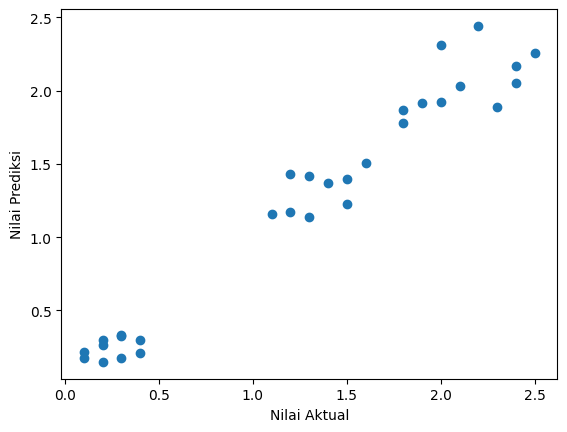

In [23]:
plt.scatter(y_test_iris, y_pred_test_iris)
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.show()

In [24]:
rmse_linear = np.sqrt(mean_squared_error(y_test_iris, y_pred_test_iris))
print(f"Multivariate Linear Regression: {rmse_linear:.3f}")

Multivariate Linear Regression: 0.170


3. Bangun model regresi non linear terhadap data Iris dengan fungsi sigmoid dan fungsi cubic

## Sigmoid Function

### Menentukan Variabel Input dan Target

In [25]:
X_f = df_iris[['sepal_length', 'sepal_width', 'petal_length', 'species']].values
y_f = df_iris['petal_width'].values

### Data Splitting

In [26]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=0.2, random_state=42)

In [27]:
print(X_f.shape)
print(y_f.shape)

(149, 4)
(149,)


### Standarisasi Data

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_f)
X_test_scaled = scaler.transform(X_test_f)

In [29]:
# Fungsi sigmoid untuk multivariat
def sigmoid(X_f, a, b, c):
    z = a * X_f[:, 0] + b * X_f[:, 1] + c
    return 1 / (1 + np.exp(-z))

In [30]:
params_sigmoid, _ = curve_fit(sigmoid, X_train_scaled, y_train_f)
y_test_pred_sigmoid = sigmoid(X_test_scaled, *params_sigmoid)

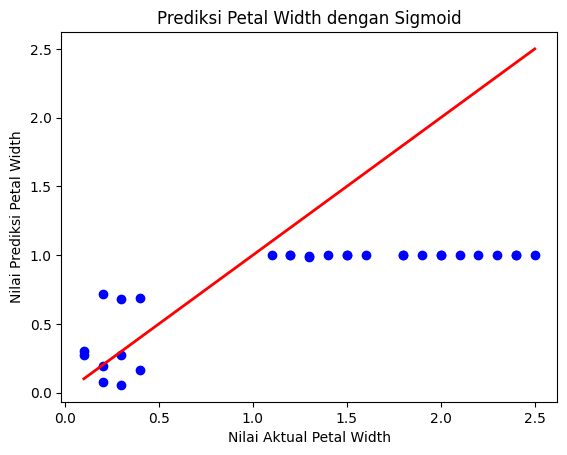

In [31]:
# Visualisasi hasil prediksi
plt.scatter(y_test_f, y_test_pred_sigmoid, color='blue')
plt.plot([min(y_test_f), max(y_test_f)], [min(y_test_f), max(y_test_f)], color='red', lw=2)
plt.xlabel("Nilai Aktual Petal Width")
plt.ylabel("Nilai Prediksi Petal Width")
plt.title("Prediksi Petal Width dengan Sigmoid")
plt.show()

In [32]:
rmse_sigmoid = np.sqrt(mean_squared_error(y_test_f, y_test_pred_sigmoid))
print(f"Sigmoid Multivariate Regression: {rmse_sigmoid:.3f}")

Sigmoid Multivariate Regression: 0.744


## Cubic Function

In [33]:
# Fungsi cubic untuk multivariat
def cubic_multivariate(X_f, *params):
    n_features = X_f.shape[1]
    result = 0
    
    # Feature 4 parameter (a,b,c,d)
    for i in range(n_features):
        start_idx = i * 4
        a, b, c, d = params[start_idx:start_idx + 4]
        feature = X_f[:, i]
        result += a * feature**3 + b * feature**2 + c * feature + d
    bias = params[-1]
    return result + bias

In [34]:
n_features = X_train_scaled.shape[1]
initial_params = np.ones(n_features * 4 + 1)

In [35]:
# Fitting model
cubic_params, _ = curve_fit(
    cubic_multivariate, 
    X_train_scaled, 
    y_train_f, 
    p0=initial_params,
    maxfev=10000 
)

In [36]:
y_pred_cubic = cubic_multivariate(X_test_scaled, *cubic_params)
rmse_cubic = np.sqrt(mean_squared_error(y_test_f, y_pred_cubic))
print(f'Cubic Multivariate Regression: {rmse_cubic:.3f}')

Cubic Multivariate Regression: 0.158


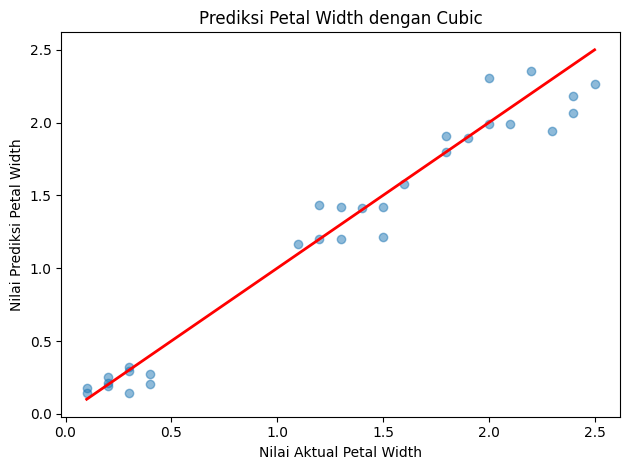

In [37]:
# Visualisasi hasil prediksi
plt.scatter(y_test_f, y_pred_cubic, alpha=0.5)
plt.plot([y_test_f.min(), y_test_f.max()], [y_test_f.min(), y_test_f.max()], color='red', lw=2)
plt.xlabel("Nilai Aktual Petal Width")
plt.ylabel("Nilai Prediksi Petal Width")
plt.title("Prediksi Petal Width dengan Cubic")
plt.tight_layout()
plt.show()

4. Jelaskan model regresi mana yang paling tepat untuk memodelkan data iris dengan metode regresi.

Jawab pertanyaan nomor 4. Multivariate Linear Regression dengan nilai RMSE sebesar 0.170 adalah model yang paling cocok di antara ketiga model tersebut. Ini menunjukkan bahwa hubungan antara variabel input dan target dalam dataset Iris bersifat non-linear dan multivariate linear regression menangkap hubungan tersebut lebih baik. Sigmoid Multivariate Regression dan Cubic Multivariate Regression menunjukkan performa yang jauh lebih buruk, dengan nilai RMSE yang tinggi, sehingga kurang cocok untuk memodelkan data ini.

5. Download DataCO2.csv, lakukan eksplorasi data dan preprocessing yang menurut anda diperlukan. 

In [38]:
df_co2 = pd.read_csv("DataCO2.csv")
df_co2.head()

,Nama,Model,Volume,Bobot,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


# Preprocessing

6. Apakah ada tipe data non numerik pada DataCO2.csv? Dan apakah ada yang bersifat nominal/ordinal? Jika ada sebutkan kolom mana saja, jika tidak jelaskan mengapa.

In [39]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nama    36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Bobot   36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


Jawab pertanyaan nomor 6: DataCO2.csv terdapat fitur dengan tipe data non-numerik yaitu fitur "Nama" dan fitur "Model". Kedua fitur tersebut bertipe data object yang berarti merupakan tipe data nominal (tanpa urutan tertentu). Dalam melakukan analisis regresi, tipe data nominal tidak bisa langsung dilakukan analisis regresi, untuk itu diperlukan teknik encode untuk membuat tipe data nominal menjadi numerik. Dan apakah ada yang bersifat nominal/ordinal? Jawabannya adalah fitur "Nama" dan "Model" bersifat nominal dan tidak ada fitur yang bersifat ordinal. 

In [40]:
df_co2.isna().sum()

Nama      0
Model     0
Volume    0
Bobot     0
CO2       0
dtype: int64

In [41]:
df_co2.duplicated().sum()

0

In [42]:
#check unique values
for i in tqdm(['Nama', 'Model', 'Volume', 'Bobot', 'CO2']):
  print(f'Unique Value for {i}: ')
  print(df_co2[i].unique())
  print()

  0%|          | 0/5 [00:00<?, ?it/s]

Unique Value for Nama: 
['Toyoty' 'Mitsubishi' 'Skoda' 'Fiat' 'Mini' 'VW' 'Mercedes' 'Ford' 'Audi'
 'Hyundai' 'Suzuki' 'Honda' 'Hundai' 'Opel' 'BMW' 'Mazda' 'Volvo']

Unique Value for Model: 
['Aygo' 'Space Star' 'Citigo' '500' 'Cooper' 'Up!' 'Fabia' 'A-Class'
 'Fiesta' 'A1' 'I20' 'Swift' 'Civic' 'I30' 'Astra' '1' '3' 'Rapid' 'Focus'
 'Mondeo' 'Insignia' 'C-Class' 'Octavia' 'S60' 'CLA' 'A4' 'A6' 'V70' '5'
 'E-Class' 'XC70' 'B-Max' '216' 'Zafira' 'SLK']

Unique Value for Volume: 
[1000 1200  900 1500 1400 1600 1100 1300 2200 2000 2100 2500]

Unique Value for Bobot: 
[ 790 1160  929  865 1140 1109 1365 1112 1150  980  990 1252 1326 1330
 1280 1119 1328 1584 1428 1415 1465 1490 1725 1523 1705 1605 1746 1235
 1390 1405 1395]

Unique Value for CO2: 
[ 99  95  90 105  92  98 101  94  97 104 102 114 109 115 117 108 120]



## Feature Creation

In [43]:
df_co2['Rasio'] = df_co2['Volume'] / df_co2['Bobot']
df_co2['Kategori Volume'] = pd.cut(df_co2['Volume'], bins=[0, 1200, 1600, 3000], labels=['kecil', 'sedang', 'besar'])
df_co2['Kategori Bobot'] = pd.cut(df_co2['Bobot'], bins=[0, 1100, 1400, 2000], labels=['ringan', 'sedang', 'berat'])

In [44]:
encoder = LabelEncoder()
df_co2[['Nama', 'Model', 'Kategori Volume', 'Kategori Bobot']] = df_co2[['Nama', 'Model', 'Kategori Volume', 'Kategori Bobot']].apply(encoder.fit_transform)

In [45]:
df_co2

,Nama,Model,Volume,Bobot,CO2,Rasio,Kategori Volume,Kategori Bobot
0,14,10,1000,790,99,1.265823,1,1
1,10,29,1200,1160,95,1.034483,1,2
2,12,14,1000,929,95,1.076426,1,1
3,2,4,900,865,90,1.040462,1,1
4,9,16,1500,1140,105,1.315789,2,2
5,15,31,1000,929,105,1.076426,1,1
6,12,18,1400,1109,90,1.262399,2,2
7,8,5,1500,1365,92,1.098901,2,2
8,3,19,1500,1112,98,1.348921,2,2
9,0,6,1600,1150,99,1.391304,2,2


<function matplotlib.pyplot.show(close=None, block=None)>

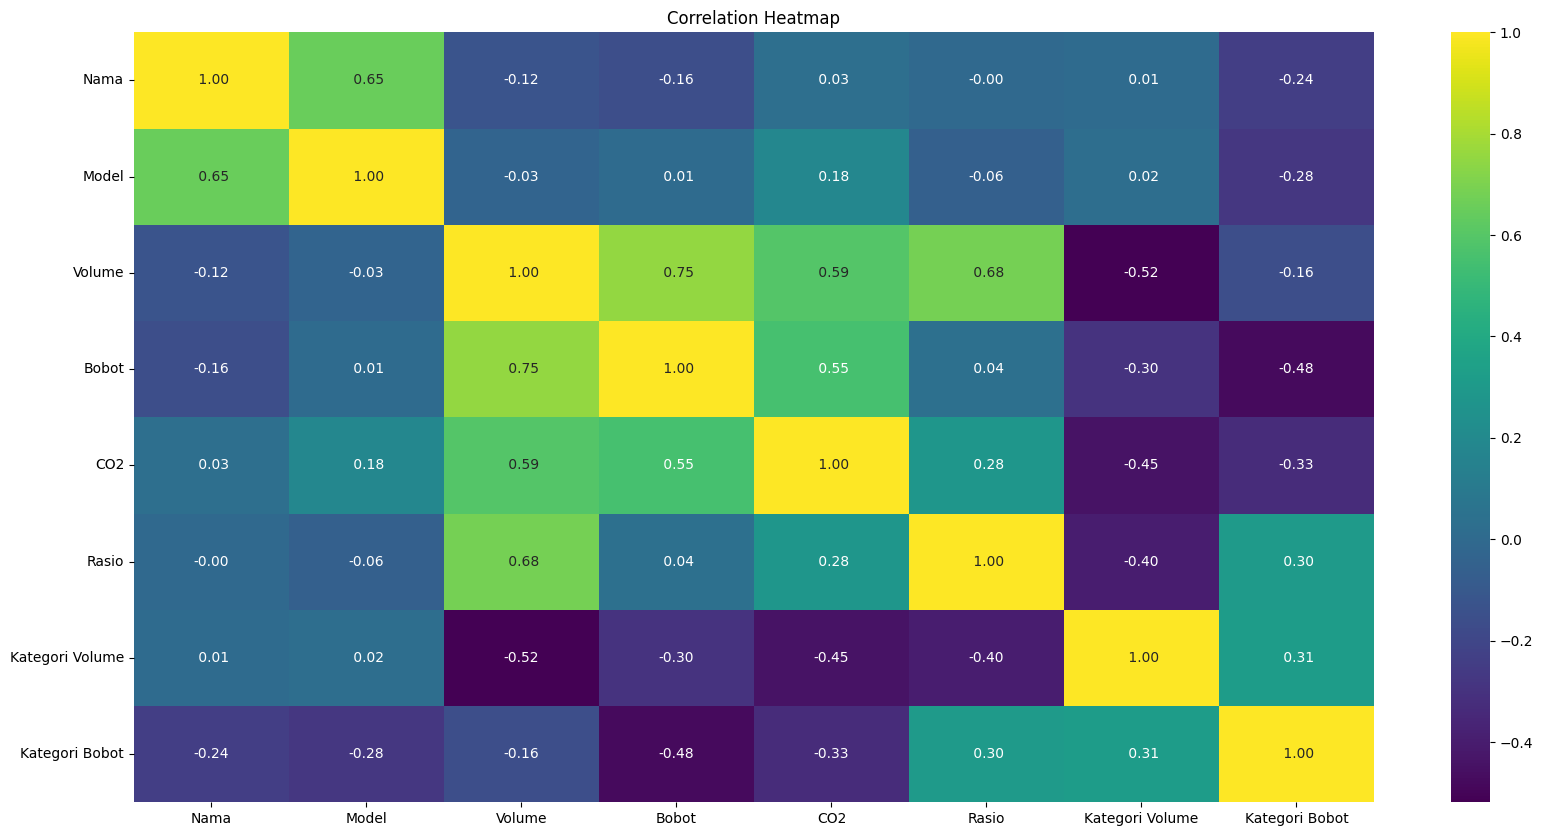

In [46]:
# Heatmap
corr = df_co2.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=" .2f")
plt.title('Correlation Heatmap')
plt.show

7. Buatlah model regresi menggunakan metode yang paling tepat menurut anda. 

## Data Splitting

In [48]:
X_co2 = df_co2.drop('CO2', axis=1)
y_co2 = df_co2['CO2']

In [49]:
X_train_co2, X_test_co2, y_train_co2, y_test_co2 = train_test_split(X_co2, y_co2, test_size=0.2, random_state=42)

In [50]:
print(X_co2.shape)
print(y_co2.shape)

(36, 7)
(36,)


## Regresi Linear

In [51]:
lr = LinearRegression()

In [52]:
lr.fit(X_train_co2, y_train_co2)

LinearRegression()

In [53]:
c = lr.intercept_
c

12.549625947942289

In [54]:
m = lr.coef_
m

array([-1.58815426e-01,  6.82214373e-02, -4.98752092e-02,  6.68264697e-02,
        6.98791792e+01, -1.90474970e+00, -1.57614337e+00])

In [55]:
# Prediksi Model
y_pred = lr.predict(X_test_co2)
y_pred

array([103.80342214,  99.14477037, 106.64575335, 106.38811319,
        98.75648133, 109.23336298, 105.91952845,  95.58916408])

In [56]:
y_pred_co2 = lr.predict(X_test_co2)

In [57]:
rmse_linear = np.sqrt(mean_squared_error(y_test_co2, y_pred_co2))
print(f"Linear Regression: {rmse_linear:.3f}")

Linear Regression: 7.825


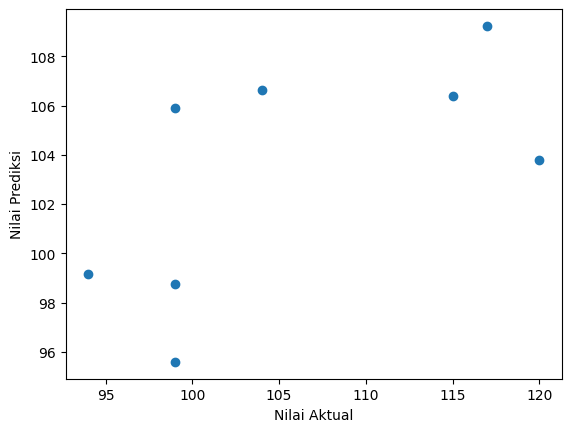

In [58]:
plt.scatter(y_test_co2, y_pred_co2)
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.show()